The objective of the following article is to obtain a step-by-step guide on building the `Simple Exponential Smoothing (SES)` using the function `SimpleExponentialSmoothing()` with `Statsforecast`.

During this walkthrough, we will become familiar with the main `StatsForecast` class and some relevant methods such as `StatsForecast.plot`, `StatsForecast.forecast` and `StatsForecast.cross_validation` in other.

Let's start!!!

<a class="anchor" id="0.1"></a>
# **Table of Contents** 


1.	[Introduction](#1)
2.	[Simple Exponential Smoothing (SES)](#2) 
3.	[Installing Statsforecast](#3)
4.	[Loading libraries and data](#4)
5.	[Explore Data with the plot method](#5)
6.	[Split the data into training and testing](#6)
7.	[Implementation of Simple Exponential Smoothing (SES) with StatsForecast](#7)
8.  [Evaluate the model’s performance](#8)
9.  [Evaluate the model](#9)
10. [References](#10)

# **1. Introduction** <a class="anchor" id="1"></a>

[Table of Contents](#0)

Exponential smoothing was proposed in the late 1950s (Brown, 1959; Holt, 1957; Winters, 1960), and has motivated some of the most successful forecasting methods. Forecasts produced using exponential smoothing methods are weighted averages of past observations, with the weights decaying exponentially as the observations get older. In other words, the more recent the observation the higher the associated weight. This framework generates reliable forecasts quickly and for a wide range of time series, which is a great advantage and of major importance to applications in industry.

The simple exponential smoothing model is a method used in time series analysis to predict future values based on historical observations. This model is based on the idea that future values of a time series will be influenced by past values, and that the influence of past values will decrease exponentially as you go back in time.

The simple exponential smoothing model uses a smoothing factor, which is a number between 0 and 1 that indicates the relative importance given to past observations in predicting future values. A value of 1 indicates that all past observations are given equal importance, while a value of 0 indicates that only the latest observation is considered.

The simple exponential smoothing model can be expressed mathematically as:

$$\hat{y}_{T+1|T} = \alpha y_T + \alpha(1-\alpha) y_{T-1} + \alpha(1-\alpha)^2 y_{T-2}+ \cdots,  $$


where $y_T$ is the observed value in period $t$, $\hat{y}_{T+1|T}$ is the predicted value for the next period, y $(t-1)$ is the observed value in the previous period, and $\alpha$ is the smoothing factor.

The simple exponential smoothing model is a widely used forecasting model due to its simplicity and ease of use. However, it also has its limitations, as it cannot capture complex patterns in the data and is not suitable for time series with trends or seasonal patterns.

# **2. Building of Simple exponential smoothing model** <a class="anchor" id="2"></a>

[Table of Contents](#0)

The simplest of the exponentially smoothing methods is naturally called simple exponential smoothing (SES). This method is suitable for forecasting data with no clear trend or seasonal pattern.

Using the naïve method, all forecasts for the future are equal to the last observed value of the series,
$$\hat{y}_{T+h|T} = y_{T},$$

for $h=1,2,\dots $. Hence, the naïve method assumes that the most recent observation is the only important one, and all previous observations provide no information for the future. This can be thought of as a weighted average where all of the weight is given to the last observation.

Using the average method, all future forecasts are equal to a simple average of the observed data,
$$\hat{y}_{T+h|T} = \frac1T \sum_{t=1}^T y_t, $$

for $h=1,2,\dots $ Hence, the average method assumes that all observations are of equal importance, and gives them equal weights when generating forecasts.

We often want something between these two extremes. For example, it may be sensible to attach larger weights to more recent observations than to observations from the distant past. This is exactly the concept behind simple exponential smoothing. Forecasts are calculated using weighted averages, where the weights decrease exponentially as observations come from further in the past — the smallest weights are associated with the oldest observations:

\begin{equation}
  \hat{y}_{T+1|T} = \alpha y_T + \alpha(1-\alpha) y_{T-1} + \alpha(1-\alpha)^2 y_{T-2}+ \cdots,   \tag{1}
\end{equation}

where $0 \le \alpha \le 1$ is the smoothing parameter. The one-step-ahead forecast for time $T+1$ is a weighted average of all of the observations in the series $y_1,\dots,y_T$. The rate at which the weights decrease is controlled by the parameter $\alpha$.

For any $\alpha$ between 0 and 1, the weights attached to the observations decrease exponentially as we go back in time, hence the name “exponential smoothing”. If $\alpha$ is small (i.e., close to 0), more weight is given to observations from the more distant past. If $\alpha$ is large (i.e., close to 1), more weight is given to the more recent observations. For the extreme case where $\alpha=1$, $\hat{y}_{T+1|T}=y_T$ and the forecasts are equal to the naïve forecasts.

We present two equivalent forms of simple exponential smoothing, each of which leads to the forecast Equation (1).


## **2.1 Weighted average form**
The forecast at time $T+1$ is equal to a weighted average between the most recent observation $y_T$ and the previous forecast $\hat{y}_{T|T-1}$: 

$$\hat{y}_{T+1|T} = \alpha y_T + (1-\alpha) \hat{y}_{T|T-1},$$

where $0 \le \alpha \le 1$ is the smoothing parameter. Similarly, we can write the fitted values as
$$\hat{y}_{t+1|t} = \alpha y_t + (1-\alpha) \hat{y}_{t|t-1},$$

for $t=1,\dots,T$. (Recall that fitted values are simply one-step forecasts of the training data.)

The process has to start somewhere, so we let the first fitted value at time 1 be denoted by $\ell_{0}$ (which we will have to estimate). Then

\begin{align*}
  \hat{y}_{2|1} &= \alpha y_1 + (1-\alpha) \ell_0\\
  \hat{y}_{3|2} &= \alpha y_2 + (1-\alpha) \hat{y}_{2|1}\\
  \hat{y}_{4|3} &= \alpha y_3 + (1-\alpha) \hat{y}_{3|2}\\
  \vdots\\
  \hat{y}_{T|T-1} &= \alpha y_{T-1} + (1-\alpha) \hat{y}_{T-1|T-2}\\
  \hat{y}_{T+1|T} &= \alpha y_T + (1-\alpha) \hat{y}_{T|T-1}.
\end{align*}

Substituting each equation into the following equation, we obtain

\begin{align*}
  \hat{y}_{3|2}   & = \alpha y_2 + (1-\alpha) \left[\alpha y_1 + (1-\alpha) \ell_0\right]              \\
                 & = \alpha y_2 + \alpha(1-\alpha) y_1 + (1-\alpha)^2 \ell_0                          \\
  \hat{y}_{4|3}   & = \alpha y_3 + (1-\alpha) [\alpha y_2 + \alpha(1-\alpha) y_1 + (1-\alpha)^2 \ell_0]\\
                 & = \alpha y_3 + \alpha(1-\alpha) y_2 + \alpha(1-\alpha)^2 y_1 + (1-\alpha)^3 \ell_0 \\
                 & ~~\vdots                                                                           \\
  \hat{y}_{T+1|T} & =  \sum_{j=0}^{T-1} \alpha(1-\alpha)^j y_{T-j} + (1-\alpha)^T \ell_{0}.
\end{align*}

The last term becomes tiny for large $T$. So, the weighted average form leads to the same forecast Equation (1).

## **2.2 Component form**
An alternative representation is the component form. For simple exponential smoothing, the only component included is the level, $\ell_{t}$. Component form representations of exponential smoothing methods comprise a forecast equation and a smoothing equation for each of the components included in the method. The component form of simple exponential smoothing is given by:

\begin{align*}
  \text{Forecast equation}  && \hat{y}_{t+h|t} & = \ell_{t}\\
  \text{Smoothing equation} && \ell_{t}        & = \alpha y_{t} + (1 - \alpha)\ell_{t-1},
\end{align*}

where $\ell_{t}$ is the level (or the smoothed value) of the series at time $t$. Setting $h=1$ gives the fitted values, while setting $t=T$ gives the true forecasts beyond the training data.

The forecast equation shows that the forecast value at time $t+1$ is the estimated level at time $t$. The smoothing equation for the level (usually referred to as the level equation) gives the estimated level of the series at each period $t$.

If we replace $\ell_{t}$ with $\hat{y}_{t+1|t}$ and $\ell_{t-1}$ with $\hat{y}_{t|t-1}$ in the smoothing equation, we will recover the weighted average form of simple exponential smoothing.

The component form of simple exponential smoothing is not particularly useful on its own, but it will be the easiest form to use when we start adding other components.


## **2.3 Flat forecasts**

Simple exponential smoothing has a “flat” forecast function:

$$\hat{y}_{T+h|T} = \hat{y}_{T+1|T}=\ell_T, \qquad h=2,3,\dots.$$

That is, all forecasts take the same value, equal to the last level component. Remember that these forecasts will only be suitable if the time series has no trend or seasonal component.

# **3. Installing Statsforecast** <a class="anchor" id="3"></a>

[Table of Contents](#0.1)

* using pip:

`pip install statsforecast`

* using with conda:

`conda install -c conda-forge statsforecast`

> ¡Warning!

We are constantly updating StatsForecast, so we suggest fixing the version to avoid issues. 

`pip install statsforecast=="1.0.0"`

# **4. Loading libraries and data** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)

In [1]:
# Handling and processing of Data
# ==============================================================================
import numpy as np
import pandas as pd

import scipy.stats as stats

# Handling and processing of Data for Date (time)
# ==============================================================================
import datetime
import time
from datetime import datetime, timedelta

In [2]:
# Plot
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import plotly.express as px
import plotly.graph_objects as go
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '333333', ##212946'
    'axes.facecolor': '333333',
    'savefig.facecolor':'333333',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#2A3459',
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 }
plt.rcParams.update(dark_style)
# Define the plot size
# ==============================================================================
from pylab import rcParams
rcParams['figure.figsize'] = (18,7)

# Hide warnings
# ==============================================================================
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/Naren8520/Serie-de-tiempo-con-Machine-Learning/main/Data/ads.csv")
df.head()

,Time,Ads
0,2017-09-13T00:00:00,80115
1,2017-09-13T01:00:00,79885
2,2017-09-13T02:00:00,89325
3,2017-09-13T03:00:00,101930
4,2017-09-13T04:00:00,121630


The input to StatsForecast is always a data frame in long format with three columns: unique_id, ds and y:

* The `unique_id` (string, int or category) represents an identifier for the series.

* The `ds` (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp.

* The `y` (numeric) represents the measurement we wish to forecast.

In [4]:
df["unique_id"]="1"
df.columns=["ds", "y", "unique_id"]
df

,ds,y,unique_id
0,2017-09-13T00:00:00,80115,1
1,2017-09-13T01:00:00,79885,1
2,2017-09-13T02:00:00,89325,1
3,2017-09-13T03:00:00,101930,1
4,2017-09-13T04:00:00,121630,1
...,...,...,...
211,2017-09-21T19:00:00,155890,1
212,2017-09-21T20:00:00,123395,1
213,2017-09-21T21:00:00,103080,1
214,2017-09-21T22:00:00,95155,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ds         216 non-null    object
 1   y          216 non-null    int64 
 2   unique_id  216 non-null    object
dtypes: int64(1), object(2)
memory usage: 5.2+ KB


In [6]:
# Convert to a datetime format
from datetime import datetime
df["ds"] = pd.to_datetime(df["ds"])

# **5. Explore Data with the plot method** <a class="anchor" id="5"></a>

[Table of Contents](#0.1)

Plot some series using the plot method from the StatsForecast class. This method prints 8 random series from the dataset and is useful for basic EDA.

In [7]:
from statsforecast import StatsForecast

StatsForecast.plot(df)

## **5.1 Autocorrelation plots**

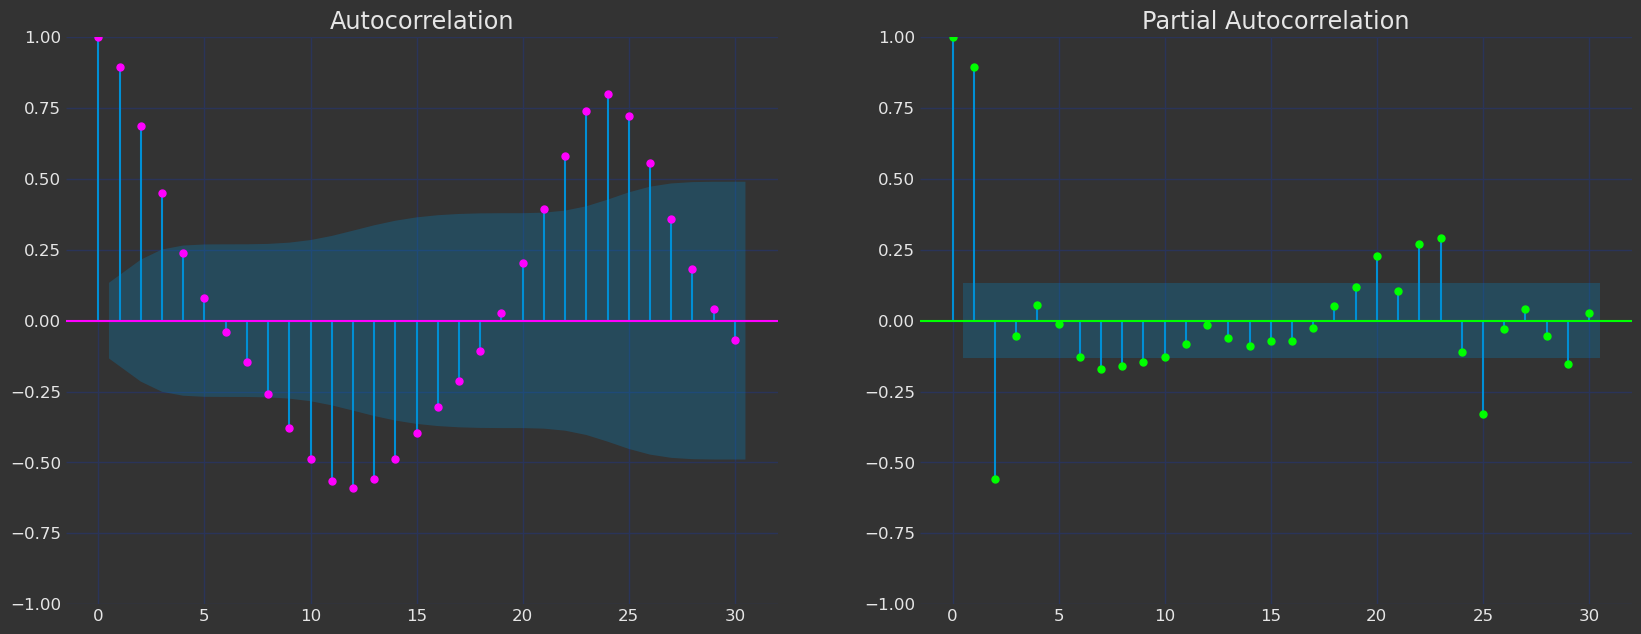

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=2)

plot_acf(df["y"],  lags=30, ax=axs[0],color="fuchsia")
axs[0].set_title("Autocorrelation");

# Grafico
plot_pacf(df["y"],  lags=30, ax=axs[1],color="lime")
axs[1].set_title('Partial Autocorrelation')

#plt.savefig("Gráfico de Densidad y qq")
plt.show();

# **6. Split the data into training and testing** <a class="anchor" id="6"></a>

[Table of Contents](#0.1)

Let's divide our data into sets
1. Data to train our `Simple Exponential Smoothing (SES)`.
2. Data to test our model

For the test data we will use the last 30 hours to test and evaluate the performance of our model.

In [9]:
train = df[df.ds<='2017-09-20 17:00:00'] 
test = df[df.ds>'2017-09-20 17:00:00'] 

In [10]:
train.shape, test.shape

((186, 3), (30, 3))

Now let's plot the training data and the test data.

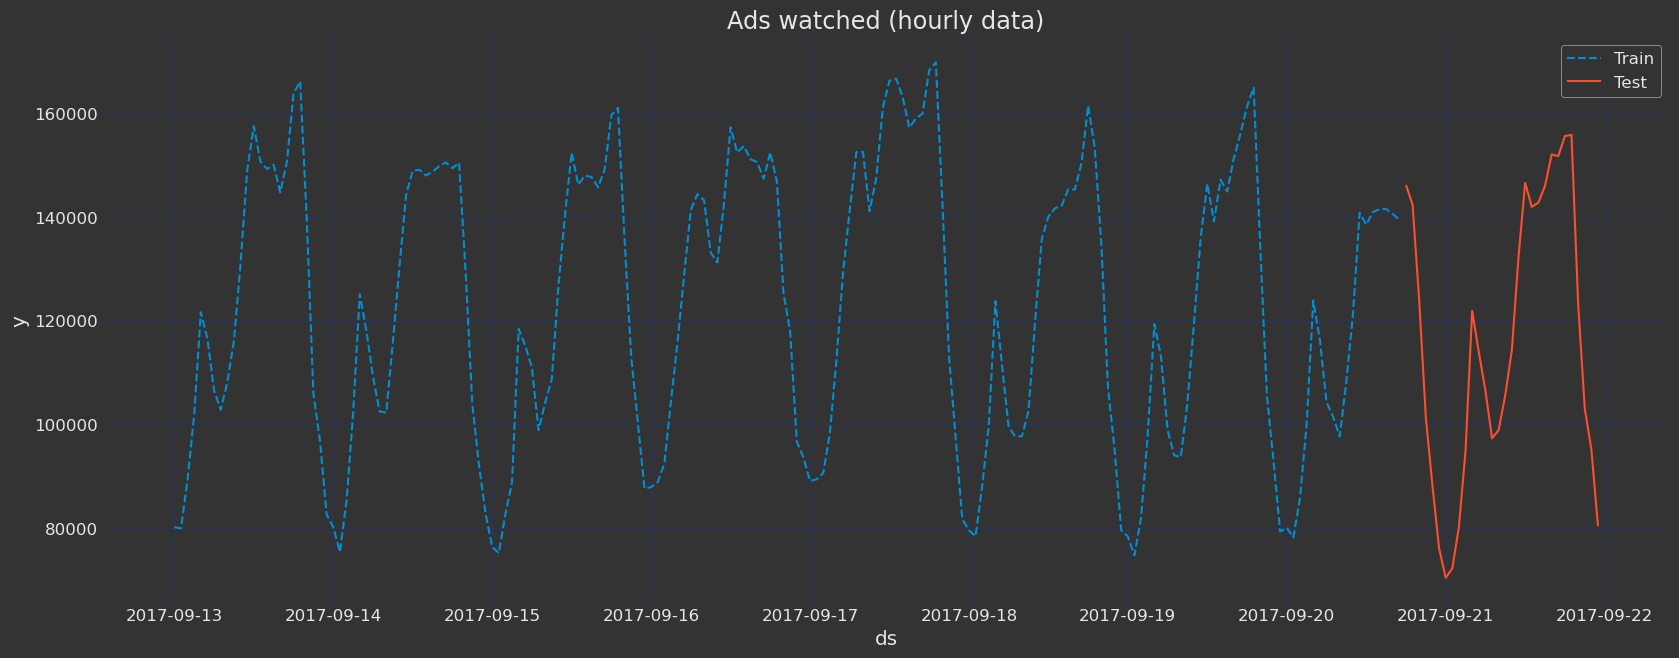

In [11]:
sns.lineplot(train,x="ds", y="y", label="Train", linestyle="--")
sns.lineplot(test, x="ds", y="y", label="Test")
plt.title("Ads watched (hourly data)");
plt.show()

# **7. Implementation of `Simple Exponential Smoothing (SES)` with StatsForecast** <a class="anchor" id="7"></a>

[Table of Contents](#0.1)

To also know more about the parameters of the functions of the `Simple Exponential Smoothing (SES)` you can see it [here](https://nixtla.github.io/statsforecast/src/core/models.html#simplesmooth).

## **7.1 Load libraries**

In [12]:
from statsforecast import StatsForecast
from statsforecast.models import SimpleExponentialSmoothing

In [13]:
?SimpleExponentialSmoothing

Init signature: SimpleExponentialSmoothing(alpha: float, alias: str = 'SES')
Docstring:     
SimpleExponentialSmoothing model.

Uses a weighted average of all past observations where the weights decrease exponentially into the past.
Suitable for data with no clear trend or seasonality.
Assuming there are $t$ observations, the one-step forecast is given by: $\hat{y}_{t+1} = \alpha y_t + (1-\alpha) \hat{y}_{t-1}$

The rate $0 \leq \alpha \leq 1$ at which the weights decrease is called the smoothing parameter. When $\alpha = 1$, SES is equal to the naive method.

**References:**<br>
[Charles C Holt (1957). “Forecasting seasonals and trends by exponentially weighted moving averages”](https://doi.org/10.1016/j.ijforecast).

Parameters
----------
alpha : float
    Smoothing parameter.
alias : str
    Custom name of the model.
File:           ~/miniconda3/envs/statsforecast/lib/python3.10/site-packages/statsforecast/models.py
Type:           type
Subclasses:     

## **7.2 Building Model**
We are going to build different models, for different values of alpha.

In [14]:
horizon = len(test)
# We call the model that we are going to use
models = [SimpleExponentialSmoothing(alpha=0.1, alias="SES01"),
          SimpleExponentialSmoothing(alpha=0.5,alias="SES05"),
          SimpleExponentialSmoothing(alpha=0.8,alias="SES08")
          ]

We fit the models by instantiating a new StatsForecast object with the following parameters:

models: a list of models. Select the models you want from models and import them.

* `freq:` a string indicating the frequency of the data. (See [panda’s available frequencies](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).)

* `n_jobs:` n_jobs: int, number of jobs used in the parallel processing, use -1 for all cores.

* `fallback_model:` a model to be used if a model fails.

Any settings are passed into the constructor. Then you call its fit method and pass in the historical data frame.

In [15]:
# Instantiate StatsForecast class as sf
sf = StatsForecast(df=df,
                   models=models,
                   freq='H', # hourly frequency
                   n_jobs=-1)

## **7.3 Fit the Model**

In [16]:
# fit the models
sf.fit()

StatsForecast(models=[SES01,SES05,SES08])

Let's see the results of our Simple `Simple Exponential Smoothing model (SES)`. We can observe it with the following instruction:

In [17]:
result01=sf.fitted_[0,0].model_
result05=sf.fitted_[0,1].model_
result08=sf.fitted_[0,2].model_
result01

{'mean': array([120864.91], dtype=float32),
 'fitted': array([       nan,  80115.   ,  80092.   ,  81015.3  ,  83106.77 ,
         86959.09 ,  89910.69 ,  91569.12 ,  92691.7  ,  94228.03 ,
         96417.73 ,  99878.96 , 104793.06 , 110072.76 , 114136.98 ,
        117652.78 , 120897.5  , 123285.75 , 126026.18 , 129807.56 ,
        133450.3  , 134057.28 , 131241.05 , 127794.945, 123267.445,
        118953.2  , 114591.38 , 111642.74 , 110686.47 , 112131.32 ,
        112721.19 , 112371.57 , 111381.914, 110467.73 , 111004.95 ,
        112958.45 , 116095.11 , 119382.6  , 122359.336, 124927.41 ,
        127315.664, 129567.1  , 131667.39 , 133444.66 , 135152.19 ,
        134549.97 , 131476.47 , 127546.32 , 123068.19 , 118392.875,
        114066.586, 110923.92 , 108711.03 , 109682.93 , 110233.64 ,
        110304.27 , 109159.84 , 108662.36 , 108662.625, 110460.36 ,
        113457.83 , 117359.05 , 120250.64 , 123027.58 , 125498.32 ,
        127523.484, 129699.64 , 132702.17 , 135540.45 , 135538

As we can see, the result obtained above has an output in a dictionary, to extract each element from the dictionary we are going to use the `.get()` function to extract the element and then we are going to save it in a `pd.DataFrame()`.

In [18]:
fitted=pd.DataFrame(result01.get("fitted"), columns=["fitted01"])
fitted["fitted05"]=result05.get("fitted")
fitted["fitted08"]=result08.get("fitted")
fitted["ds"]=df["ds"]
fitted

,fitted01,fitted05,fitted08,ds
0,NaN,NaN,NaN,2017-09-13 00:00:00
1,80115.000000,80115.000000,80115.000000,2017-09-13 01:00:00
2,80092.000000,80000.000000,79931.000000,2017-09-13 02:00:00
3,81015.296875,84662.500000,87446.203125,2017-09-13 03:00:00
4,83106.773438,93296.250000,99033.242188,2017-09-13 04:00:00
...,...,...,...,...
211,129891.343750,152690.265625,154849.078125,2017-09-21 19:00:00
212,132491.203125,154290.140625,155681.812500,2017-09-21 20:00:00
213,131581.593750,138842.562500,129852.359375,2017-09-21 21:00:00
214,128731.429688,120961.281250,108434.468750,2017-09-21 22:00:00


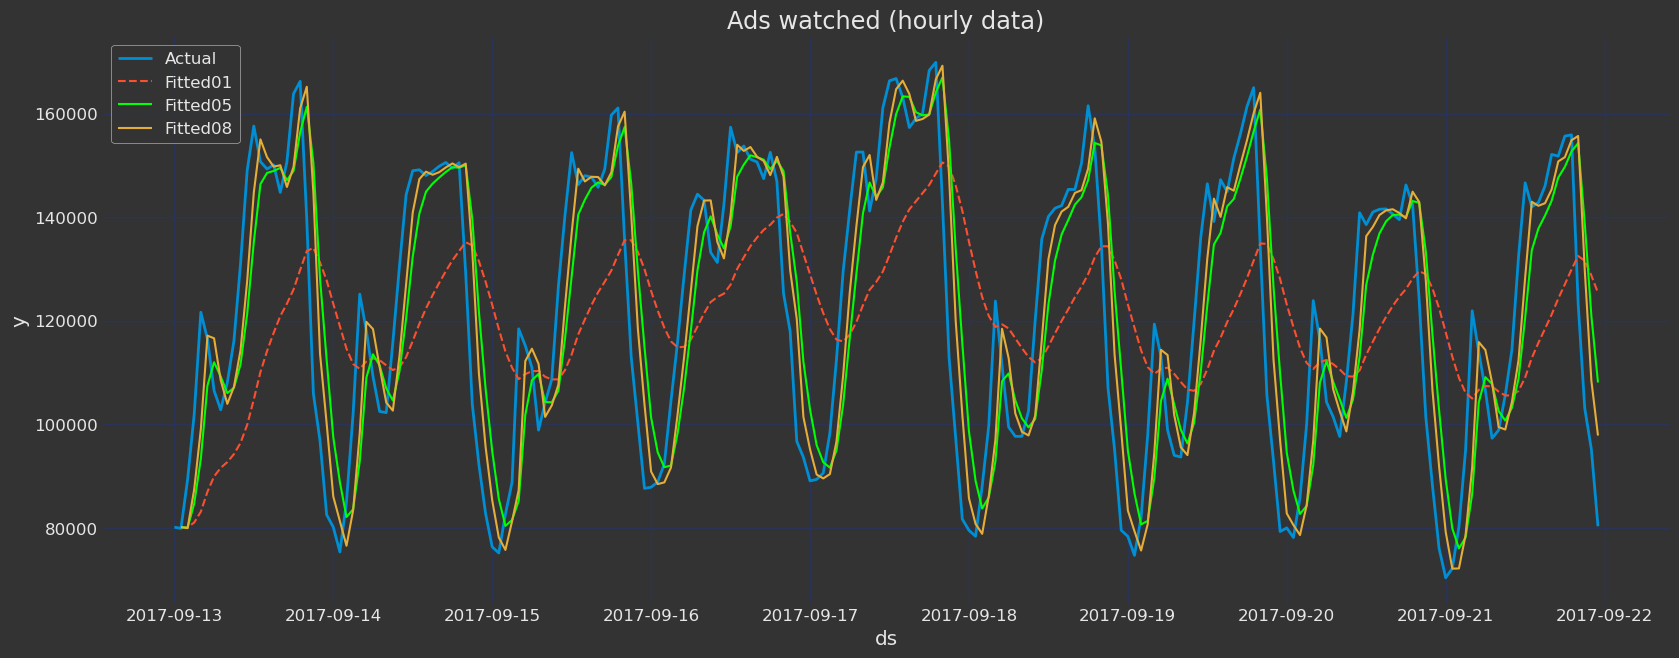

In [19]:
sns.lineplot(df, x="ds", y="y", label="Actual", linewidth=2)
sns.lineplot(fitted,x="ds", y="fitted01", label="Fitted01", linestyle="--", )
sns.lineplot(fitted, x="ds", y="fitted05", label="Fitted05", color="lime")
sns.lineplot(fitted, x="ds", y="fitted08", label="Fitted08")
plt.title("Ads watched (hourly data)");
plt.show()

## **7.4 Forecast Method**

If you want to gain speed in productive settings where you have multiple series or models we recommend using the `StatsForecast.forecast` method instead of `.fit` and `.predict`.

The main difference is that the `.forecast` doest not store the fitted values and is highly scalable in distributed environments.

The forecast method takes two arguments: forecasts next `h` (horizon) and `level`.

* `h (int):` represents the forecast h steps into the future. In this case, 30 hours ahead.

The forecast object here is a new data frame that includes a column with the name of the model and the y hat values, as well as columns for the uncertainty intervals. Depending on your computer, this step should take around 1min. (If you want to speed things up to a couple of seconds, remove the AutoModels like `ARIMA` and `Theta`)

In [20]:
# Prediction
Y_hat = sf.forecast(h=horizon, fitted=True)

Y_hat.head()

,ds,SES01,SES05,SES08
unique_id,,,,
1,2017-09-22 00:00:00,120864.90625,94171.570312,83790.179688
1,2017-09-22 01:00:00,120864.90625,94171.570312,83790.179688
1,2017-09-22 02:00:00,120864.90625,94171.570312,83790.179688
1,2017-09-22 03:00:00,120864.90625,94171.570312,83790.179688
1,2017-09-22 04:00:00,120864.90625,94171.570312,83790.179688


In [21]:
values=sf.forecast_fitted_values()
values.head()

,ds,y,SES01,SES05,SES08
unique_id,,,,,
1,2017-09-13 00:00:00,80115.0,NaN,NaN,NaN
1,2017-09-13 01:00:00,79885.0,80115.000000,80115.00,80115.000000
1,2017-09-13 02:00:00,89325.0,80092.000000,80000.00,79931.000000
1,2017-09-13 03:00:00,101930.0,81015.296875,84662.50,87446.203125
1,2017-09-13 04:00:00,121630.0,83106.773438,93296.25,99033.242188


In [22]:
StatsForecast.plot(values)

In [23]:
Y_hat=Y_hat.reset_index()
Y_hat.head()

,unique_id,ds,SES01,SES05,SES08
0,1,2017-09-22 00:00:00,120864.90625,94171.570312,83790.179688
1,1,2017-09-22 01:00:00,120864.90625,94171.570312,83790.179688
2,1,2017-09-22 02:00:00,120864.90625,94171.570312,83790.179688
3,1,2017-09-22 03:00:00,120864.90625,94171.570312,83790.179688
4,1,2017-09-22 04:00:00,120864.90625,94171.570312,83790.179688


## **7.5 Predict method**

To generate forecasts use the predict method.

The predict method takes two arguments: forecasts the next `h` (for horizon).
* `h (int):` represents the forecast $h$ steps into the future. In this case, 30 hours ahead.

The forecast object here is a new data frame that includes a column with the name of the model and the `y hat` values, as well as columns for the uncertainty intervals.

This step should take less than 1 second.

In [24]:
forecast_df = sf.predict(h=horizon) 

forecast_df

,ds,SES01,SES05,SES08
unique_id,,,,
1,2017-09-22 00:00:00,120864.90625,94171.570312,83790.179688
1,2017-09-22 01:00:00,120864.90625,94171.570312,83790.179688
1,2017-09-22 02:00:00,120864.90625,94171.570312,83790.179688
1,2017-09-22 03:00:00,120864.90625,94171.570312,83790.179688
1,2017-09-22 04:00:00,120864.90625,94171.570312,83790.179688
1,2017-09-22 05:00:00,120864.90625,94171.570312,83790.179688
1,2017-09-22 06:00:00,120864.90625,94171.570312,83790.179688
1,2017-09-22 07:00:00,120864.90625,94171.570312,83790.179688
1,2017-09-22 08:00:00,120864.90625,94171.570312,83790.179688


We can join the forecast result with the historical data using the pandas function `pd.concat()`, and then be able to use this result for graphing.

In [25]:
df_plot=pd.concat([df, forecast_df]).set_index('ds')
df_plot

,y,unique_id,SES01,SES05,SES08
ds,,,,,
2017-09-13 00:00:00,80115.0,1,NaN,NaN,NaN
2017-09-13 01:00:00,79885.0,1,NaN,NaN,NaN
2017-09-13 02:00:00,89325.0,1,NaN,NaN,NaN
2017-09-13 03:00:00,101930.0,1,NaN,NaN,NaN
2017-09-13 04:00:00,121630.0,1,NaN,NaN,NaN
...,...,...,...,...,...
2017-09-23 01:00:00,NaN,NaN,120864.90625,94171.570312,83790.179688
2017-09-23 02:00:00,NaN,NaN,120864.90625,94171.570312,83790.179688
2017-09-23 03:00:00,NaN,NaN,120864.90625,94171.570312,83790.179688


Text(0, 0.5, '')

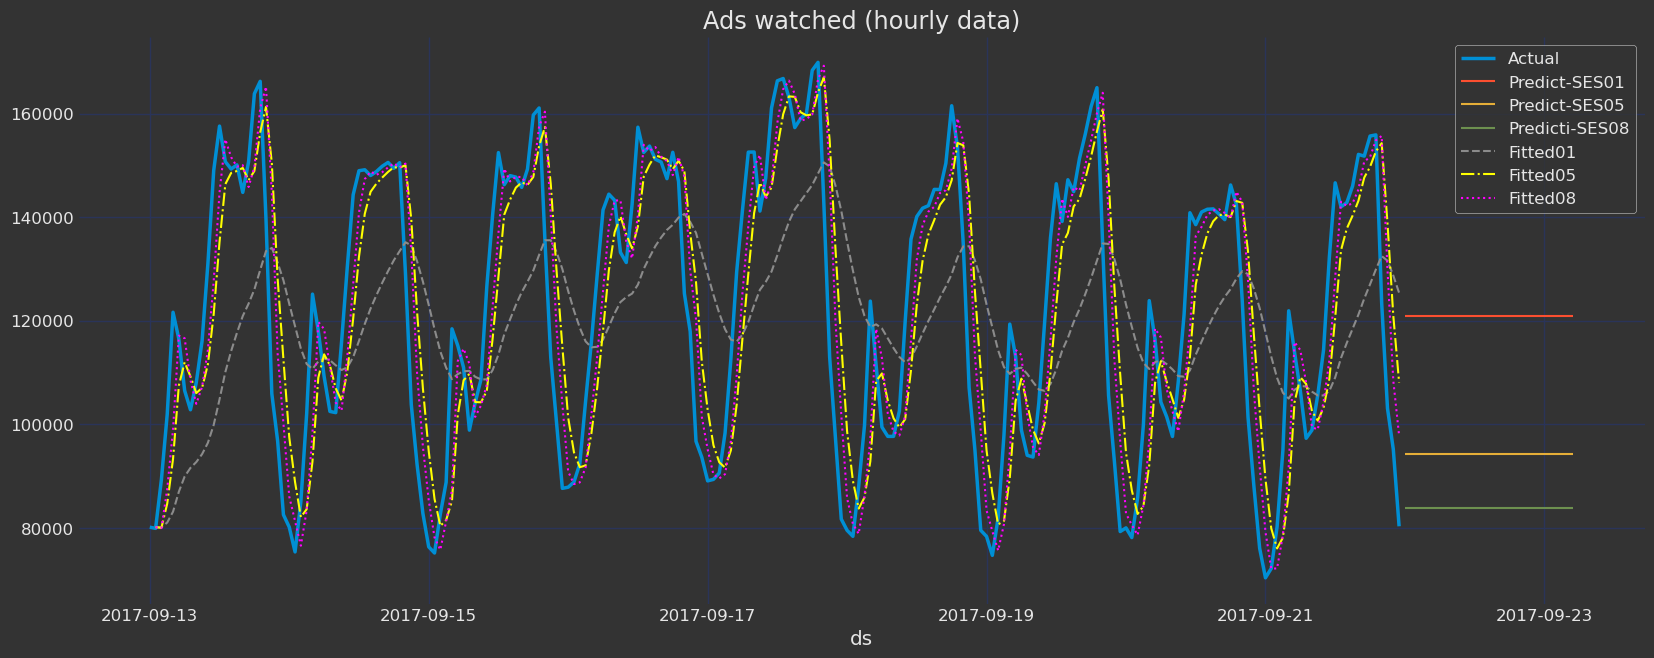

In [26]:
# Plot the data and the exponentially smoothed data
plt.plot(df_plot['y'],label="Actual", linewidth=2.5)
plt.plot(df_plot['SES01'], label="Predict-SES01")
plt.plot(df_plot['SES05'], label="Predict-SES05")
plt.plot(df_plot['SES08'], label="Predicti-SES08")
sns.lineplot(fitted,x="ds", y="fitted01", label="Fitted01", linestyle="--", )  # '-', '--', '-.', ':',
sns.lineplot(fitted, x="ds", y="fitted05", label="Fitted05", color="yellow", linestyle="-.",)
sns.lineplot(fitted, x="ds", y="fitted08", label="Fitted08", color="fuchsia" ,linestyle=":")
plt.title("Ads watched (hourly data)");
plt.ylabel("")

Let's plot the same graph using the plot function that comes in `Statsforecast`, as shown below.

In [27]:
sf.plot(df, forecast_df)

# **8. Evaluate the model’s performance** <a class="anchor" id="8"></a>

[Table of Contents](#0.1)

In previous steps, we’ve taken our historical data to predict the future. However, to asses its accuracy we would also like to know how the model would have performed in the past. To assess the accuracy and robustness of your models on your data perform Cross-Validation.

With time series data, Cross Validation is done by defining a sliding window across the historical data and predicting the period following it. This form of cross-validation allows us to arrive at a better estimation of our model’s predictive abilities across a wider range of temporal instances while also keeping the data in the training set contiguous as is required by our models.

The following graph depicts such a Cross Validation Strategy:

![](https://raw.githubusercontent.com/Nixtla/statsforecast/main/nbs/imgs/ChainedWindows.gif)

## **8.1 Perform time series cross-validation**

Cross-validation of time series models is considered a best practice but most implementations are very slow. The statsforecast library implements cross-validation as a distributed operation, making the process less time-consuming to perform. If you have big datasets you can also perform Cross Validation in a distributed cluster using Ray, Dask or Spark.

In this case, we want to evaluate the performance of each model for the last 30 hourly `(n_windows=)`, forecasting every second months `(step_size=30)`. Depending on your computer, this step should take around 1 min.

The cross_validation method from the StatsForecast class takes the following arguments.

* `df:` training data frame

* `h (int):` represents h steps into the future that are being forecasted. In this case, 30 hours ahead.

* `step_size (int):` step size between each window. In other words: how often do you want to run the forecasting processes.

* `n_windows(int):` number of windows used for cross validation. In other words: what number of forecasting processes in the past do you want to evaluate.

In [28]:
crossvalidation_df = sf.cross_validation(df=df,
                                         h=horizon,
                                         step_size=30,
                                         n_windows=3)

The crossvaldation_df object is a new data frame that includes the following columns:

* `unique_id:` index. If you dont like working with index just run `crossvalidation_df.resetindex()`.
* `ds:` datestamp or temporal index
* `cutoff:` the last datestamp or temporal index for the `n_windows`.
* `y:` true value
* `model:` columns with the model’s name and fitted value.

In [29]:
crossvalidation_df

,ds,cutoff,y,SES01,SES05,SES08
unique_id,,,,,,
1,2017-09-18 06:00:00,2017-09-18 05:00:00,99440.0,118499.953125,109816.250,112747.695312
1,2017-09-18 07:00:00,2017-09-18 05:00:00,97655.0,118499.953125,109816.250,112747.695312
1,2017-09-18 08:00:00,2017-09-18 05:00:00,97655.0,118499.953125,109816.250,112747.695312
1,2017-09-18 09:00:00,2017-09-18 05:00:00,102565.0,118499.953125,109816.250,112747.695312
1,2017-09-18 10:00:00,2017-09-18 05:00:00,119930.0,118499.953125,109816.250,112747.695312
...,...,...,...,...,...,...
1,2017-09-21 19:00:00,2017-09-20 17:00:00,155890.0,126112.898438,140008.125,139770.906250
1,2017-09-21 20:00:00,2017-09-20 17:00:00,123395.0,126112.898438,140008.125,139770.906250
1,2017-09-21 21:00:00,2017-09-20 17:00:00,103080.0,126112.898438,140008.125,139770.906250


We’ll now plot the forecast for each cutoff period. To make the plots clearer, we’ll rename the actual values in each period.

In [30]:
cross_validation=crossvalidation_df.copy()
cross_validation.rename(columns = {'y' : 'actual'}, inplace = True) # rename actual values 

cutoff = cross_validation['cutoff'].unique()

for k in range(len(cutoff)): 
    cv = cross_validation[cross_validation['cutoff'] == cutoff[k]]
    StatsForecast.plot(df, cv.loc[:, cv.columns != 'cutoff'])

# **9. Evaluate the model** <a class="anchor" id="9"></a>

[Table of Contents](#0.1)

We can now compute the accuracy of the forecast using an appropiate accuracy metric. Here we’ll use the Root Mean Squared Error (RMSE). To do this, we first need to `install datasetsforecast`, a Python library developed **by Nixtla** that includes a function to compute the RMSE.

`pip install datasetsforecast`

In [31]:
from datasetsforecast.losses import rmse

The function to compute the RMSE takes two arguments:

1. The actual values.
2. The forecasts, in this case, `Simple Exponential Smoothing Model (SES)`.

In [32]:
from datasetsforecast.losses import mse, mae, rmse


def evaluate_cross_validation(df, metric):
    models = df.drop(columns=['ds', 'cutoff', 'y']).columns.tolist()
    evals = []
    for model in models:
        eval_ = df.groupby(['unique_id', 'cutoff']).apply(lambda x: metric(x['y'].values, x[model].values)).to_frame() # Calculate loss for every unique_id, model and cutoff.
        eval_.columns = [model]
        evals.append(eval_)
    evals = pd.concat(evals, axis=1)
    evals = evals.groupby(['unique_id']).mean(numeric_only=True) # Averages the error metrics for all cutoffs for every combination of model and unique_id
    evals['best_model'] = evals.idxmin(axis=1)
    return evals

In [33]:
evaluation_df = evaluate_cross_validation(crossvalidation_df, rmse)

evaluation_df

,SES01,SES05,SES08,best_model
unique_id,,,,
1,27676.533203,29132.158203,29308.0,SES01


# **10. References** <a class="anchor" id="10"></a>

[Table of Contents](#0)

1. Changquan Huang • Alla Petukhina. Springer series (2022). Applied Time Series Analysis and Forecasting with Python. 
2. [James D. Hamilton. Time Series Analysis Princeton University Press, Princeton, New Jersey, 1st Edition, 1994.](https://press.princeton.edu/books/hardcover/9780691042893/time-series-analysis)
3. [Nixtla Parameters](https://nixtla.github.io/statsforecast/src/core/models.html#arch-model).
4. [Pandas available frequencies](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).
5. [Rob J. Hyndman and George Athanasopoulos (2018). “Forecasting principles and practice, Time series cross-validation”.](https://otexts.com/fpp3/tscv.html).
6. [Seasonal periods- Rob J Hyndman](https://robjhyndman.com/hyndsight/seasonal-periods/).